
--- Before Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB
None

Numeric Summary:
             book_id        user_id         rating
count  981756.000000  981756.000000  981756.000000
mean     4943.275636   25616.759933       3.856534
std      2873.207415   15228.338826       0.983941
min         1.000000       1.000000       1.000000
25%      2457.000000   12372.000000       3.000000
50%      4921.000000   25077.000000       4.000000
75%      7414.000000   38572.000000       5.000000
max     10000.000000   53424.000000       5.000000

Categorical Summary:
No categorical columns present.


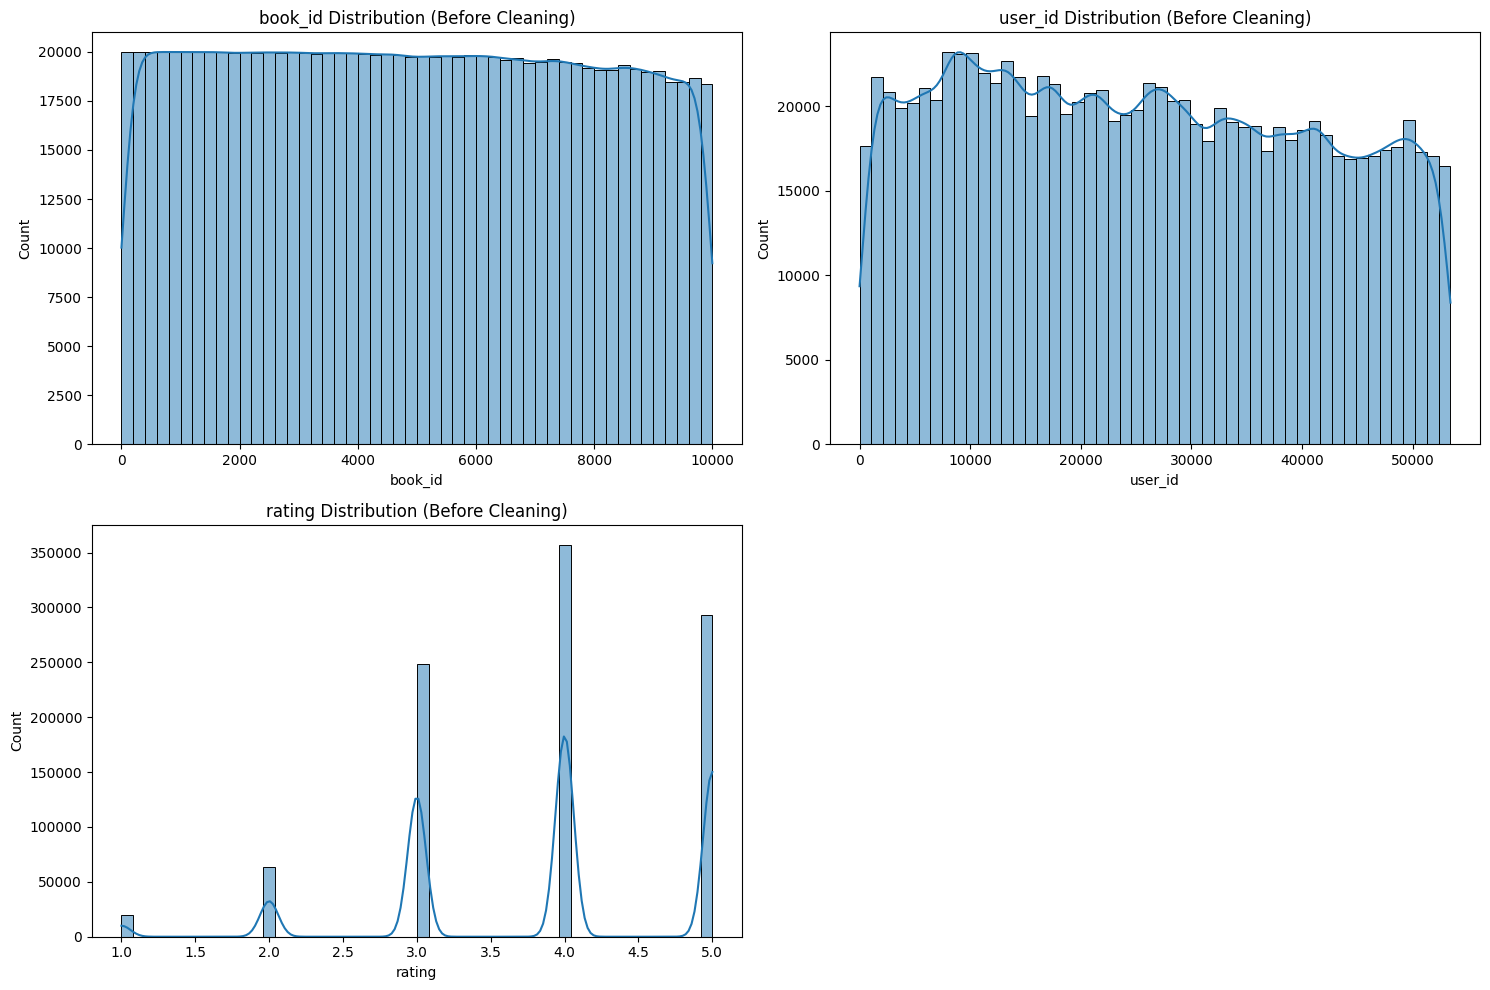


Additional Checks:
Missing values per column:
book_id    0
user_id    0
rating     0
dtype: int64

Duplicate rows: 1644
Duplicate user-book pairs: 2278


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
ratings = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data/ratings.csv")

# Function to analyze data
def analyze_data(df, stage="Before Cleaning"):
    print(f"\n--- {stage} ---")
    print("Data Info:")
    print(df.info())
    print("\nNumeric Summary:")
    print(df.describe())
    print("\nCategorical Summary:")
    if any(df.dtypes == 'object'):
        print(df.describe(include='object'))
    else:
        print("No categorical columns present.")

    # Identify numeric and categorical columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Plots for numeric columns (up to 4)
    if len(numeric_cols) > 0:
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(numeric_cols[:4], 1):  # Limit to 4 for simplicity
            plt.subplot(2, 2, i)
            sns.histplot(df[col].dropna(), bins=50, kde=True)
            plt.title(f'{col} Distribution ({stage})')
            plt.xlabel(col)
            plt.ylabel('Count')
        
        plt.tight_layout()
        plt.show()

    # Plots for categorical columns (up to 2)
    if len(categorical_cols) > 0:
        plt.figure(figsize=(15, 5))
        for i, col in enumerate(categorical_cols[:2], 1):  # Limit to 2
            plt.subplot(1, 2, i)
            sns.countplot(data=df, x=col)
            plt.title(f'{col} Counts ({stage})')
            plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Analyze the raw ratings data
analyze_data(ratings, "Before Cleaning")

# Additional Checks
print("\nAdditional Checks:")
print("Missing values per column:")
print(ratings.isnull().sum())
print("\nDuplicate rows:", ratings.duplicated().sum())
if 'user_id' in ratings.columns and 'book_id' in ratings.columns:
    print("Duplicate user-book pairs:", ratings.duplicated(subset=['user_id', 'book_id']).sum())
elif 'book_id' in ratings.columns:
    print("Unique books:", ratings['book_id'].nunique())


--- Before Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB
None

Numeric Summary:
             book_id        user_id         rating
count  981756.000000  981756.000000  981756.000000
mean     4943.275636   25616.759933       3.856534
std      2873.207415   15228.338826       0.983941
min         1.000000       1.000000       1.000000
25%      2457.000000   12372.000000       3.000000
50%      4921.000000   25077.000000       4.000000
75%      7414.000000   38572.000000       5.000000
max     10000.000000   53424.000000       5.000000

Categorical Summary:
No categorical columns present.


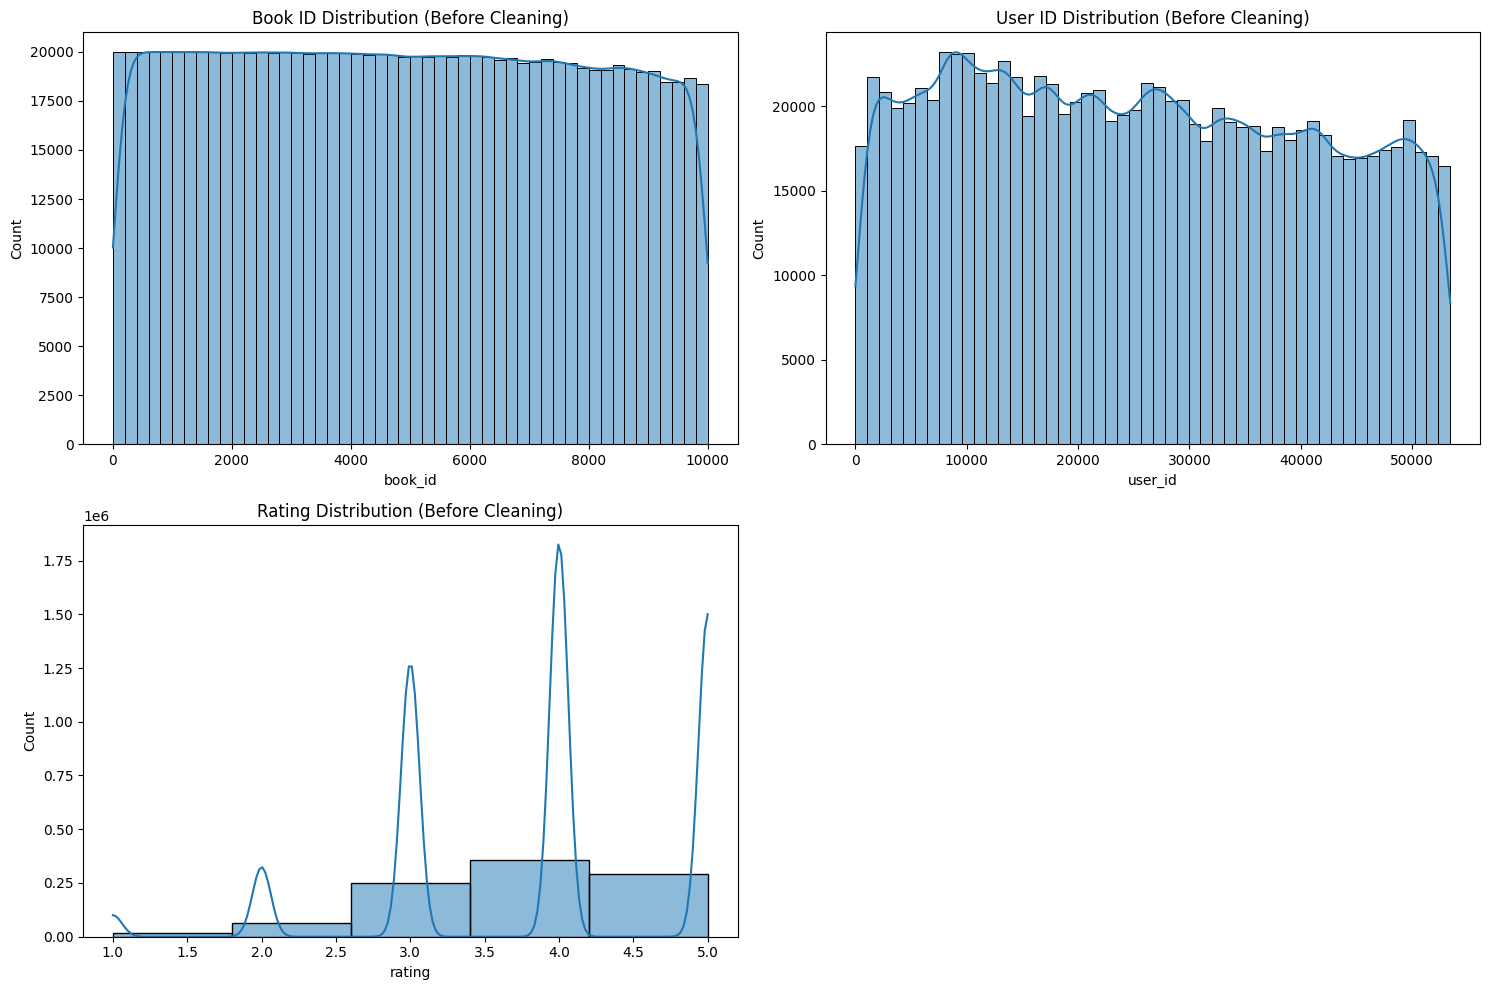


Additional Checks:
Missing values per column:
book_id    0
user_id    0
rating     0
dtype: int64
Duplicate rows: 1644
Duplicate user-book pairs: 2278
Unique books: 10000
Unique users: 53424
Sparsity (%): 0.18376684636118598
Found 4487 duplicate user-book pairs.
Duplicates removed, kept last rating.
Found 9188 invalid book_ids: [    4     7     9 ...  9997  9999 10000]
Removed ratings with invalid book_ids.

--- After Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 79531 entries, 0 to 981560
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   book_id  79531 non-null  int64
 1   user_id  79531 non-null  int64
 2   rating   79531 non-null  int64
dtypes: int64(3)
memory usage: 2.4 MB
None

Numeric Summary:
            book_id       user_id        rating
count  79531.000000  79531.000000  79531.000000
mean    4909.004024  25739.900341      3.861086
std     2814.345842  15157.263882      0.985825
min        1.000

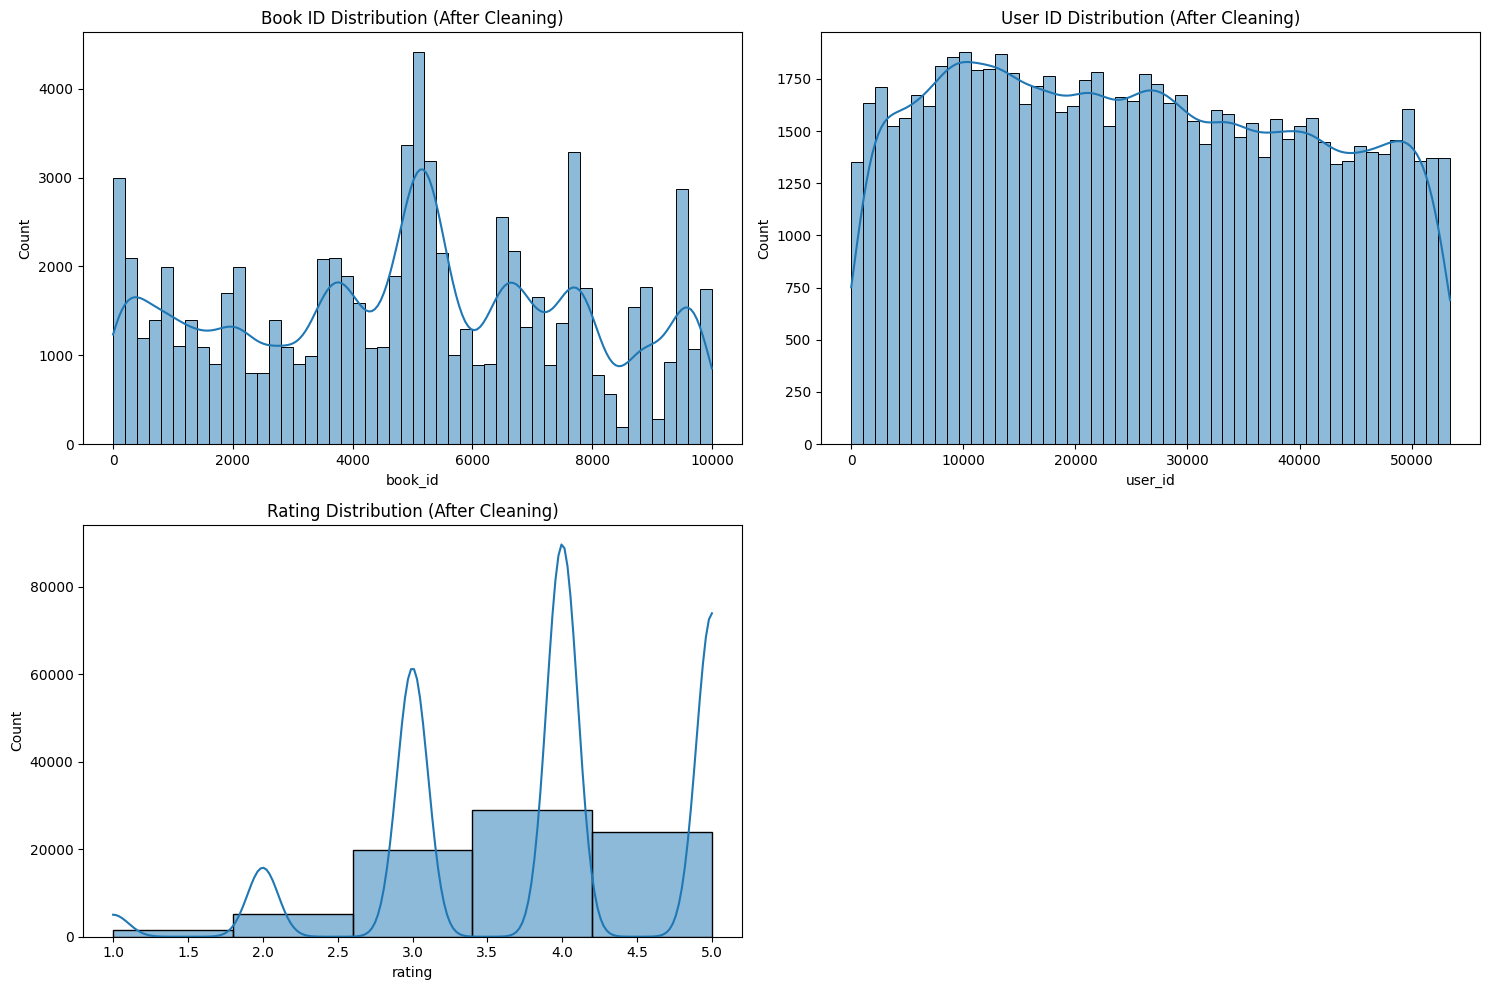


Final Validation:
Missing values: 0
Duplicate user-book pairs: 0
Unique books: 812
Unique users: 28906
Rows remaining: 79531
Cleaned data saved to 'ratings_cleaned.csv'


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
ratings = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data/ratings.csv")
books = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\books_cleaned_final.csv")

# Function to analyze data
def analyze_data(df, stage="Before Cleaning"):
    print(f"\n--- {stage} ---")
    print("Data Info:")
    print(df.info())
    print("\nNumeric Summary:")
    print(df.describe())
    print("\nCategorical Summary:")
    if any(df.dtypes == 'object'):
        print(df.describe(include='object'))
    else:
        print("No categorical columns present.")

    # Plots
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    sns.histplot(df['book_id'].dropna(), bins=50, kde=True)
    plt.title(f'Book ID Distribution ({stage})')
    plt.subplot(2, 2, 2)
    sns.histplot(df['user_id'].dropna(), bins=50, kde=True)
    plt.title(f'User ID Distribution ({stage})')
    plt.subplot(2, 2, 3)
    sns.histplot(df['rating'].dropna(), bins=5, kde=True)
    plt.title(f'Rating Distribution ({stage})')
    plt.tight_layout()
    plt.show()

# Before Cleaning Analysis
analyze_data(ratings, "Before Cleaning")

# Additional Checks
print("\nAdditional Checks:")
print("Missing values per column:")
print(ratings.isnull().sum())
print("Duplicate rows:", ratings.duplicated().sum())
print("Duplicate user-book pairs:", ratings.duplicated(subset=['user_id', 'book_id']).sum())
print("Unique books:", ratings['book_id'].nunique())
print("Unique users:", ratings['user_id'].nunique())
print("Sparsity (%):", (len(ratings) / (ratings['user_id'].nunique() * ratings['book_id'].nunique())) * 100)

# Preprocessing
ratings_cleaned = ratings.copy()

# 1. Remove duplicates (if any)
duplicate_pairs = ratings_cleaned.duplicated(subset=['user_id', 'book_id'], keep=False)
if duplicate_pairs.sum() > 0:
    print(f"Found {duplicate_pairs.sum()} duplicate user-book pairs.")
    # Keep the last rating (assuming latest), or average if preferred
    ratings_cleaned = ratings_cleaned.drop_duplicates(subset=['user_id', 'book_id'], keep='last')
    print("Duplicates removed, kept last rating.")

# 2. Validate book_id against books.csv
valid_book_ids = set(books['book_id'])
invalid_book_ids = ratings_cleaned[~ratings_cleaned['book_id'].isin(valid_book_ids)]['book_id'].unique()
if len(invalid_book_ids) > 0:
    print(f"Found {len(invalid_book_ids)} invalid book_ids:", invalid_book_ids)
    ratings_cleaned = ratings_cleaned[ratings_cleaned['book_id'].isin(valid_book_ids)]
    print("Removed ratings with invalid book_ids.")

# 3. Ensure rating range (1-5)
invalid_ratings = ratings_cleaned[~ratings_cleaned['rating'].between(1, 5)]['rating'].unique()
if len(invalid_ratings) > 0:
    print(f"Found invalid ratings:", invalid_ratings)
    ratings_cleaned = ratings_cleaned[ratings_cleaned['rating'].between(1, 5)]
    print("Removed invalid ratings.")

# After Cleaning Analysis
analyze_data(ratings_cleaned, "After Cleaning")

# Final Validation
print("\nFinal Validation:")
print("Missing values:", ratings_cleaned.isnull().sum().sum())
print("Duplicate user-book pairs:", ratings_cleaned.duplicated(subset=['user_id', 'book_id']).sum())
print("Unique books:", ratings_cleaned['book_id'].nunique())
print("Unique users:", ratings_cleaned['user_id'].nunique())
print("Rows remaining:", len(ratings_cleaned))

# Save cleaned data
ratings_cleaned.to_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\ratings_cleaned.csv", index=False)
print("Cleaned data saved to 'ratings_cleaned.csv'")


--- Before Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB
None

Numeric Summary:
             book_id        user_id         rating
count  981756.000000  981756.000000  981756.000000
mean     4943.275636   25616.759933       3.856534
std      2873.207415   15228.338826       0.983941
min         1.000000       1.000000       1.000000
25%      2457.000000   12372.000000       3.000000
50%      4921.000000   25077.000000       4.000000
75%      7414.000000   38572.000000       5.000000
max     10000.000000   53424.000000       5.000000

Categorical Summary:
No categorical columns present.


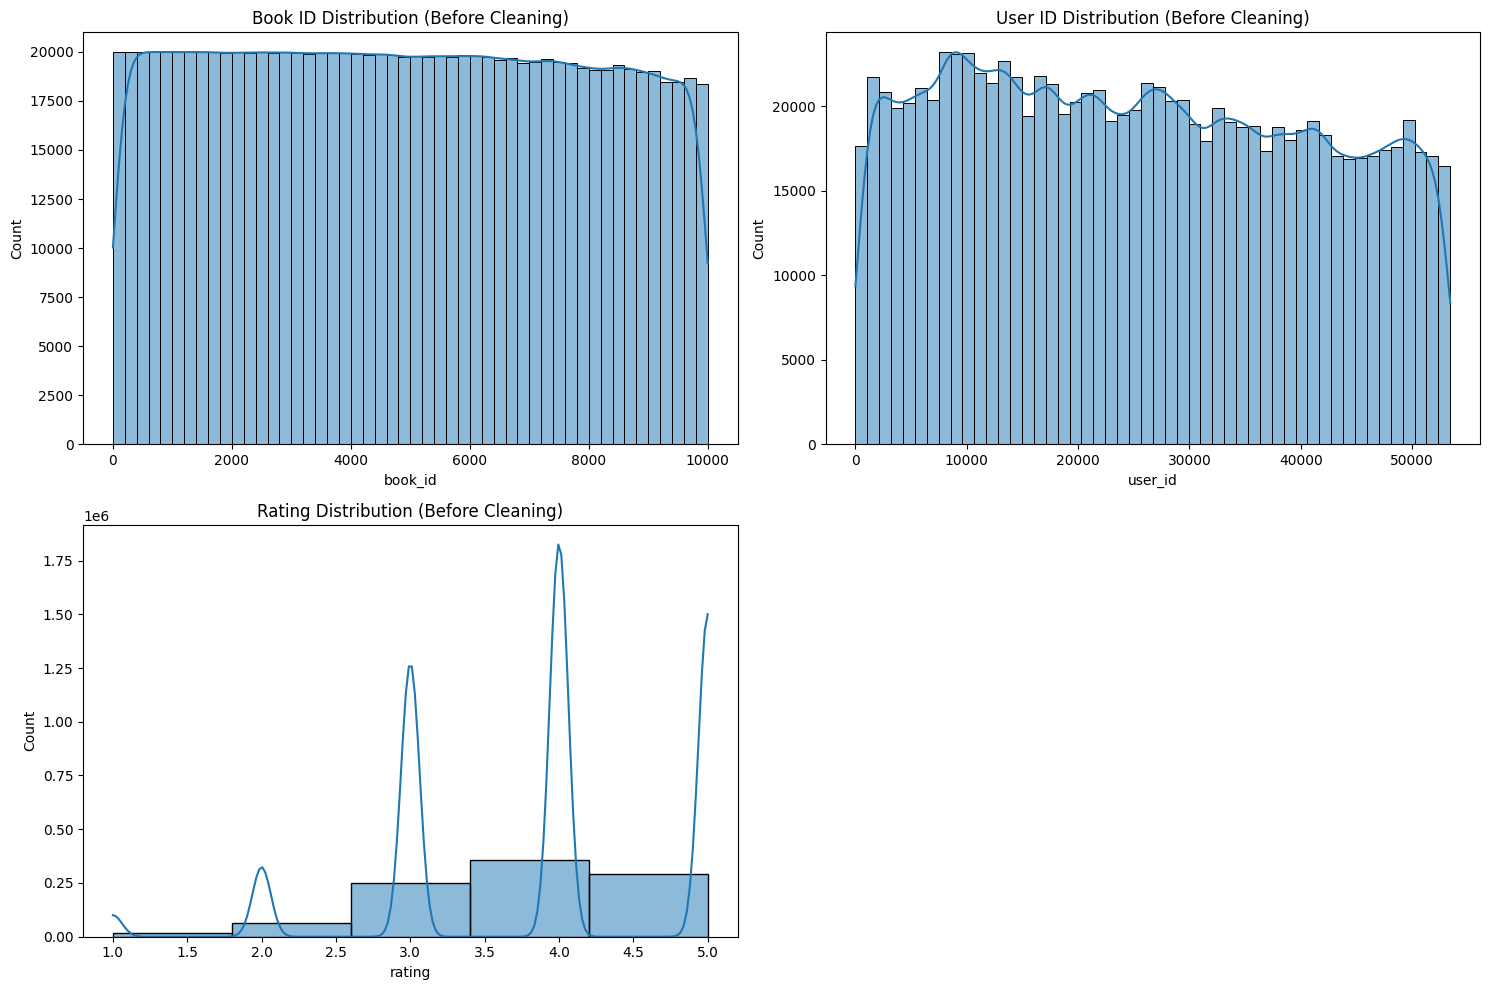


Additional Checks (Before):
Missing values per column:
book_id    0
user_id    0
rating     0
dtype: int64
Duplicate rows: 1644
Duplicate user-book pairs: 2278
Unique books: 10000
Unique users: 53424
Sparsity (%): 0.18376684636118598
Books.csv unique book_ids: 10000
Books.csv book_id range: 1 to 33288638
Found 4487 duplicate user-book pairs.
Duplicates averaged and rounded.
Found 9188 invalid book_ids: [np.int64(4), np.int64(7), np.int64(9), np.int64(12), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19)] ...
Sample ratings with invalid book_ids:
   user_id  book_id  rating
0        1     1180       4
1        1     4893       3
2        1     6285       4
3        2     8034       4
4        2     8855       5
Removed ratings with invalid book_ids.

--- After Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 79531 entries, 5 to 979464
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -

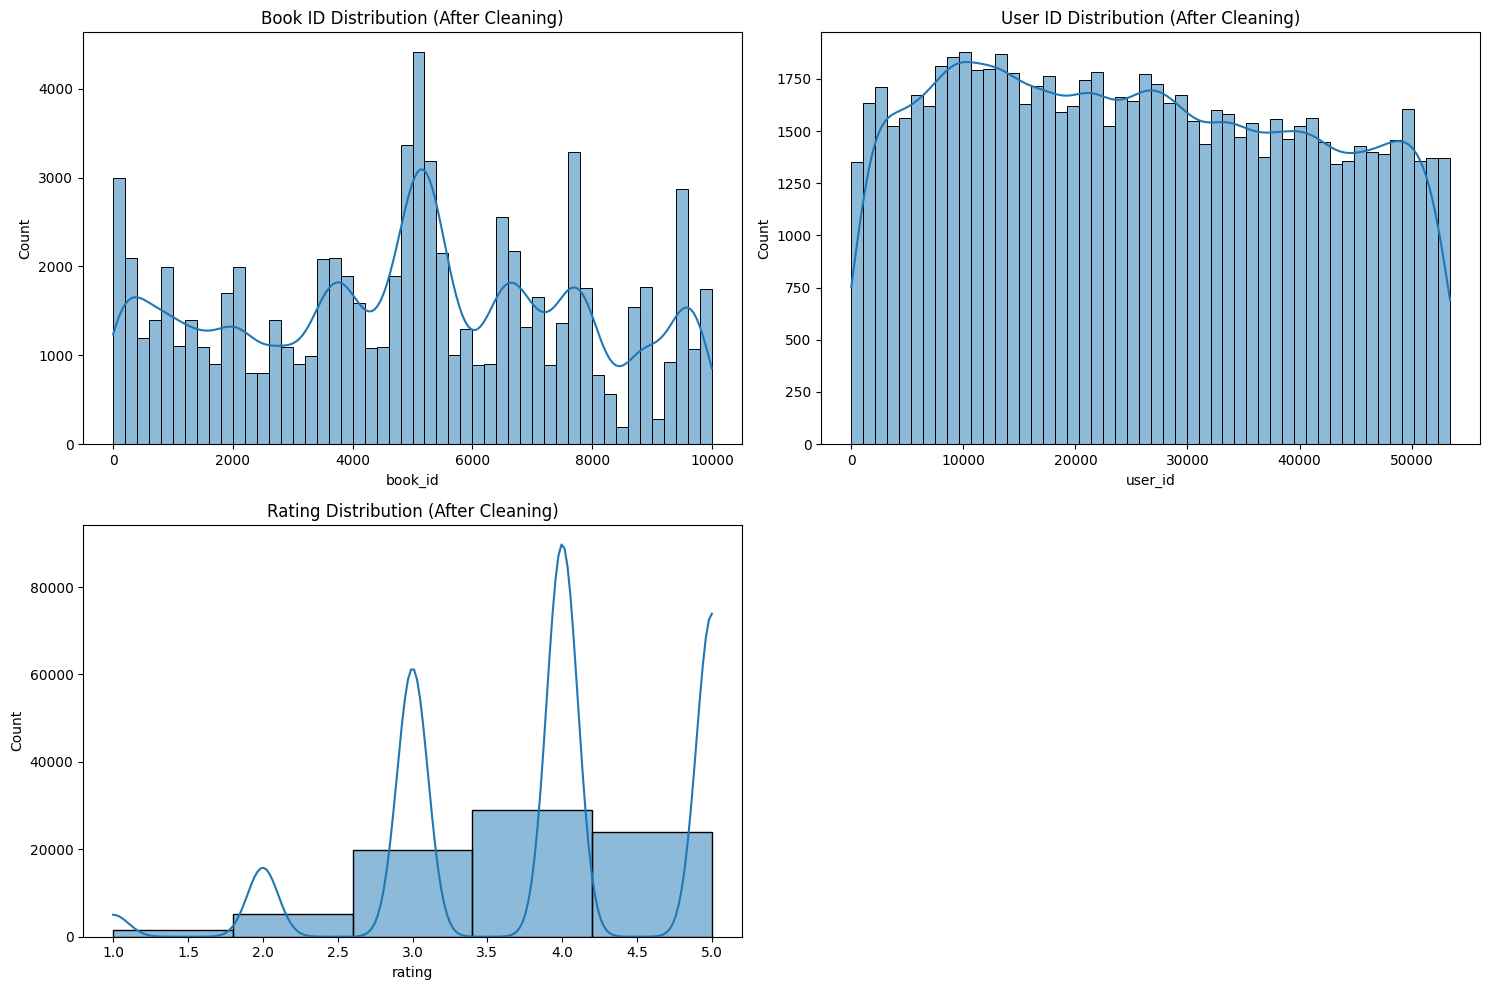


Final Validation:
Missing values: 0
Duplicate user-book pairs: 0
Unique books: 812
Unique users: 28906
Rows remaining: 79531
Sparsity (%): 0.33883823870749386
Cleaned data saved to 'ratings_cleaned.csv'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
ratings = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data/ratings.csv")
books = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\books_cleaned_final.csv")

# Function to analyze data
def analyze_data(df, stage="Before Cleaning"):
    print(f"\n--- {stage} ---")
    print("Data Info:")
    print(df.info())
    print("\nNumeric Summary:")
    print(df.describe())
    print("\nCategorical Summary:")
    if any(df.dtypes == 'object'):
        print(df.describe(include='object'))
    else:
        print("No categorical columns present.")

    # Plots
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    sns.histplot(df['book_id'].dropna(), bins=50, kde=True)
    plt.title(f'Book ID Distribution ({stage})')
    plt.subplot(2, 2, 2)
    sns.histplot(df['user_id'].dropna(), bins=50, kde=True)
    plt.title(f'User ID Distribution ({stage})')
    plt.subplot(2, 2, 3)
    sns.histplot(df['rating'].dropna(), bins=5, kde=True)
    plt.title(f'Rating Distribution ({stage})')
    plt.tight_layout()
    plt.show()

# Before Cleaning Analysis
analyze_data(ratings, "Before Cleaning")

# Additional Checks
print("\nAdditional Checks (Before):")
print("Missing values per column:")
print(ratings.isnull().sum())
print("Duplicate rows:", ratings.duplicated().sum())
print("Duplicate user-book pairs:", ratings.duplicated(subset=['user_id', 'book_id']).sum())
print("Unique books:", ratings['book_id'].nunique())
print("Unique users:", ratings['user_id'].nunique())
print("Sparsity (%):", (len(ratings) / (ratings['user_id'].nunique() * ratings['book_id'].nunique())) * 100)
print("Books.csv unique book_ids:", books['book_id'].nunique())
print("Books.csv book_id range:", books['book_id'].min(), "to", books['book_id'].max())

# Preprocessing
ratings_cleaned = ratings.copy()

# 1. Handle duplicates
duplicate_pairs = ratings_cleaned.duplicated(subset=['user_id', 'book_id'], keep=False)
if duplicate_pairs.sum() > 0:
    print(f"Found {duplicate_pairs.sum()} duplicate user-book pairs.")
    # Average ratings for duplicates instead of keeping last
    ratings_cleaned = ratings_cleaned.groupby(['user_id', 'book_id'], as_index=False).agg({'rating': 'mean'})
    # Round to nearest integer (1-5 scale)
    ratings_cleaned['rating'] = ratings_cleaned['rating'].round().astype(int)
    print("Duplicates averaged and rounded.")

# 2. Validate book_id
valid_book_ids = set(books['book_id'])
invalid_book_ids = ratings_cleaned[~ratings_cleaned['book_id'].isin(valid_book_ids)]['book_id'].unique()
print(f"Found {len(invalid_book_ids)} invalid book_ids:", sorted(invalid_book_ids)[:10], "...")
if len(invalid_book_ids) > 0:
    print("Sample ratings with invalid book_ids:")
    print(ratings_cleaned[~ratings_cleaned['book_id'].isin(valid_book_ids)].head())
    ratings_cleaned = ratings_cleaned[ratings_cleaned['book_id'].isin(valid_book_ids)]
    print("Removed ratings with invalid book_ids.")

# 3. Ensure rating range
ratings_cleaned = ratings_cleaned[ratings_cleaned['rating'].between(1, 5)]

# After Cleaning Analysis
analyze_data(ratings_cleaned, "After Cleaning")

# Final Validation
print("\nFinal Validation:")
print("Missing values:", ratings_cleaned.isnull().sum().sum())
print("Duplicate user-book pairs:", ratings_cleaned.duplicated(subset=['user_id', 'book_id']).sum())
print("Unique books:", ratings_cleaned['book_id'].nunique())
print("Unique users:", ratings_cleaned['user_id'].nunique())
print("Rows remaining:", len(ratings_cleaned))
print("Sparsity (%):", (len(ratings_cleaned) / (ratings_cleaned['user_id'].nunique() * ratings_cleaned['book_id'].nunique())) * 100)

# Save cleaned data
ratings_cleaned.to_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\ratings_cleaned.csv", index=False)
print("Cleaned data saved to 'ratings_cleaned.csv'")


--- Before Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB
None

Numeric Summary:
             book_id        user_id         rating
count  981756.000000  981756.000000  981756.000000
mean     4943.275636   25616.759933       3.856534
std      2873.207415   15228.338826       0.983941
min         1.000000       1.000000       1.000000
25%      2457.000000   12372.000000       3.000000
50%      4921.000000   25077.000000       4.000000
75%      7414.000000   38572.000000       5.000000
max     10000.000000   53424.000000       5.000000

Categorical Summary:
No categorical columns present.


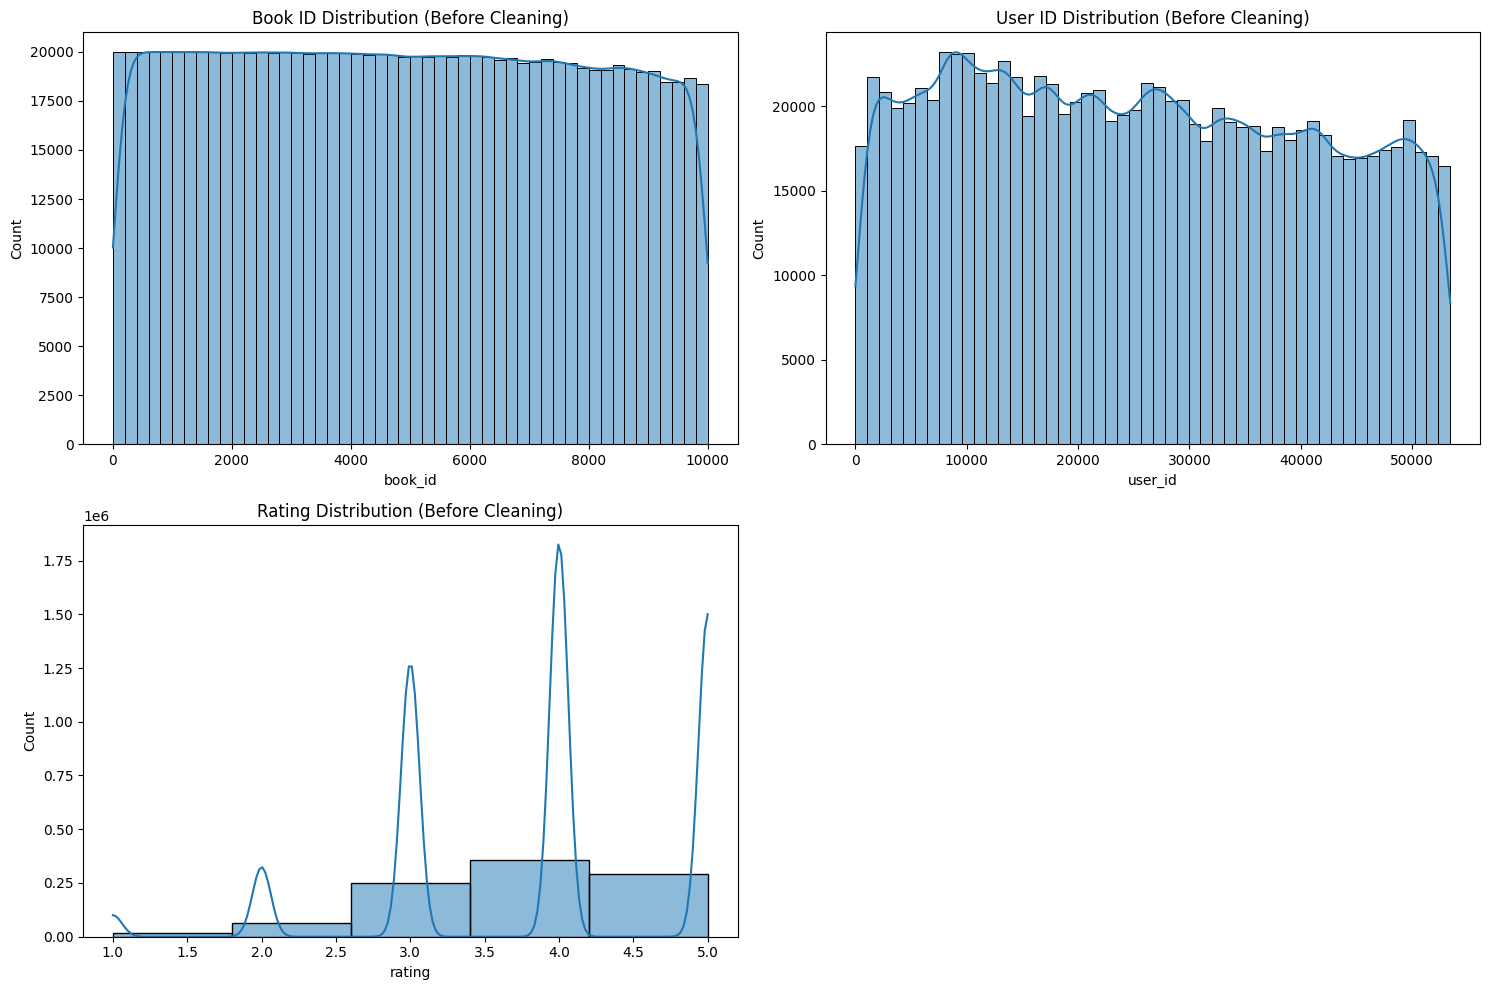


Additional Checks (Before):
Missing values per column:
book_id    0
user_id    0
rating     0
dtype: int64
Duplicate rows: 1644
Duplicate user-book pairs: 2278
Unique books: 10000
Unique users: 53424
Sparsity (%): 0.18376684636118598
Books.csv unique book_ids: 10000
Books.csv book_id range: 1 to 33288638
Sample books.csv book_ids: [2767052, 3, 41865, 2657, 4671]
Found 4487 duplicate user-book pairs.
Duplicates averaged and rounded.
Found 0 invalid book_ids: [] ...
All book_ids are valid (1-10,000).
Book IDs overlapping with books.csv: 812

--- After Cleaning ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979478 entries, 0 to 979477
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  979478 non-null  int64
 1   book_id  979478 non-null  int64
 2   rating   979478 non-null  int64
dtypes: int64(3)
memory usage: 22.4 MB
None

Numeric Summary:
             user_id        book_id         rating
count  9794

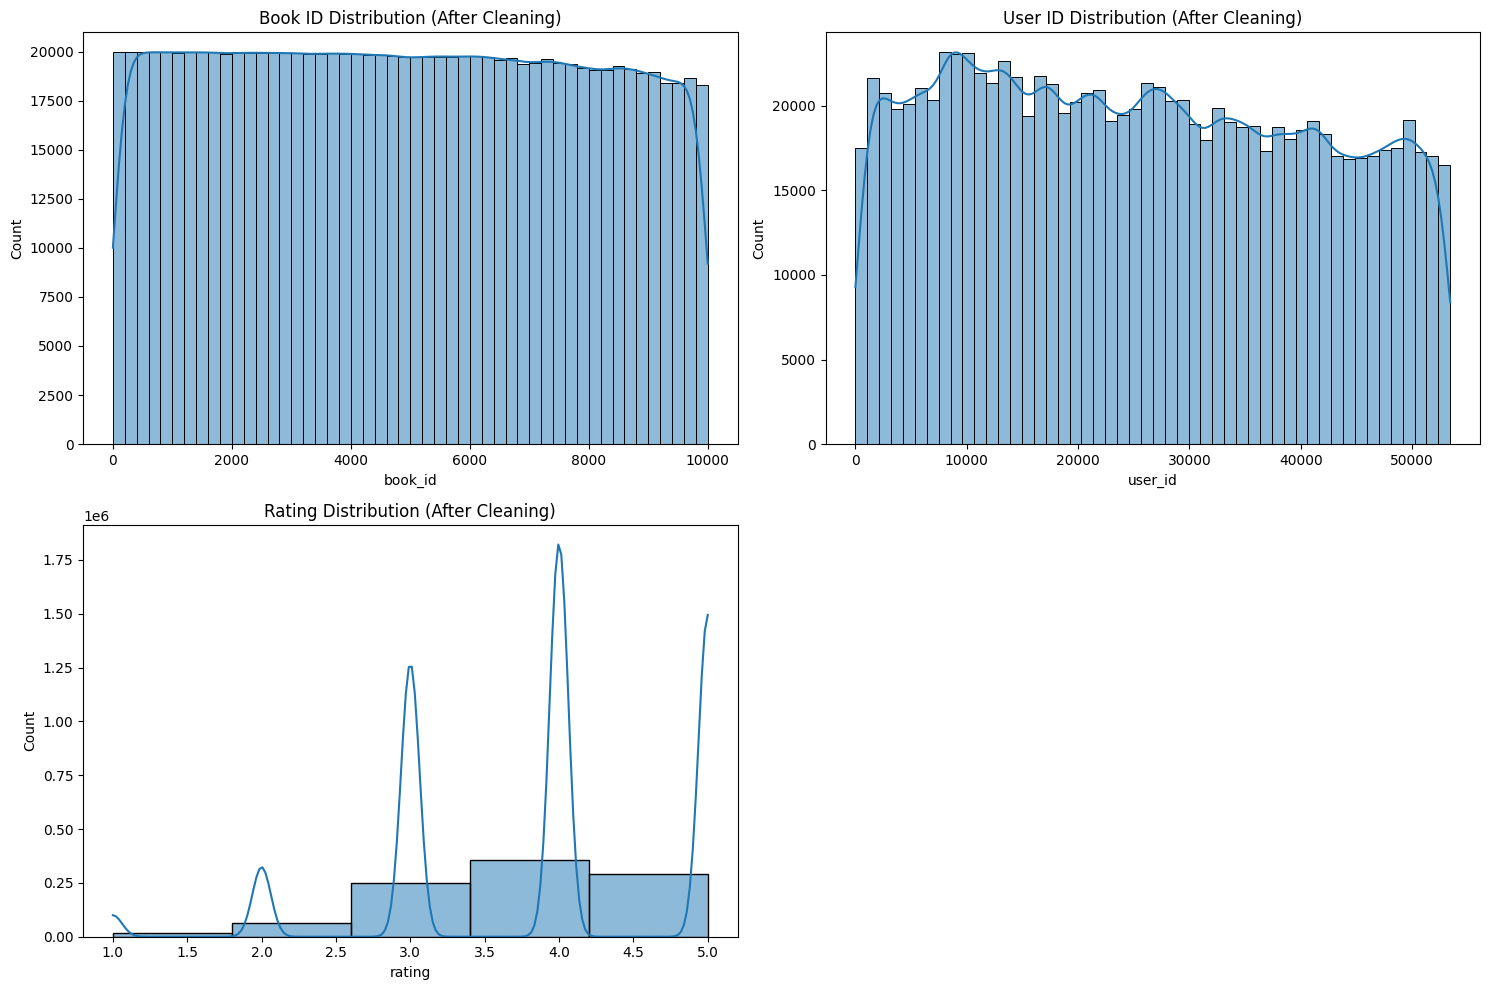


Final Validation:
Missing values: 0
Duplicate user-book pairs: 0
Unique books: 10000
Unique users: 10000
Rows remaining: 979478
Sparsity (%): 0.18334044624138962
Cleaned data saved to 'ratings_cleaned.csv'


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
ratings = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data/ratings.csv")
books = pd.read_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\books_cleaned_final.csv")

# Function to analyze data
def analyze_data(df, stage="Before Cleaning"):
    print(f"\n--- {stage} ---")
    print("Data Info:")
    print(df.info())
    print("\nNumeric Summary:")
    print(df.describe())
    print("\nCategorical Summary:")
    if any(df.dtypes == 'object'):
        print(df.describe(include='object'))
    else:
        print("No categorical columns present.")

    # Plots
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    sns.histplot(df['book_id'].dropna(), bins=50, kde=True)
    plt.title(f'Book ID Distribution ({stage})')
    plt.subplot(2, 2, 2)
    sns.histplot(df['user_id'].dropna(), bins=50, kde=True)
    plt.title(f'User ID Distribution ({stage})')
    plt.subplot(2, 2, 3)
    sns.histplot(df['rating'].dropna(), bins=5, kde=True)
    plt.title(f'Rating Distribution ({stage})')
    plt.tight_layout()
    plt.show()

# Before Cleaning Analysis
analyze_data(ratings, "Before Cleaning")

# Additional Checks
print("\nAdditional Checks (Before):")
print("Missing values per column:")
print(ratings.isnull().sum())
print("Duplicate rows:", ratings.duplicated().sum())
print("Duplicate user-book pairs:", ratings.duplicated(subset=['user_id', 'book_id']).sum())
print("Unique books:", ratings['book_id'].nunique())
print("Unique users:", ratings['user_id'].nunique())
print("Sparsity (%):", (len(ratings) / (ratings['user_id'].nunique() * ratings['book_id'].nunique())) * 100)
print("Books.csv unique book_ids:", books['book_id'].nunique())
print("Books.csv book_id range:", books['book_id'].min(), "to", books['book_id'].max())
print("Sample books.csv book_ids:", books['book_id'].head().tolist())

# Preprocessing
ratings_cleaned = ratings.copy()

# 1. Handle duplicates
duplicate_pairs = ratings_cleaned.duplicated(subset=['user_id', 'book_id'], keep=False)
if duplicate_pairs.sum() > 0:
    print(f"Found {duplicate_pairs.sum()} duplicate user-book pairs.")
    ratings_cleaned = ratings_cleaned.groupby(['user_id', 'book_id'], as_index=False).agg({'rating': 'mean'})
    ratings_cleaned['rating'] = ratings_cleaned['rating'].round().astype(int)
    print("Duplicates averaged and rounded.")

# 2. Validate book_id (use ratings.csv range 1-10000, not books.csv)
valid_book_ids = set(range(1, 10001))  # 1 to 10,000 from ratings.csv
invalid_book_ids = ratings_cleaned[~ratings_cleaned['book_id'].isin(valid_book_ids)]['book_id'].unique()
print(f"Found {len(invalid_book_ids)} invalid book_ids:", sorted(invalid_book_ids)[:10], "...")
if len(invalid_book_ids) > 0:
    print("Sample ratings with invalid book_ids:")
    print(ratings_cleaned[~ratings_cleaned['book_id'].isin(valid_book_ids)].head())
    ratings_cleaned = ratings_cleaned[ratings_cleaned['book_id'].isin(valid_book_ids)]
    print("Removed ratings with invalid book_ids.")
else:
    print("All book_ids are valid (1-10,000).")

# 3. Link to books.csv (optional check for overlap)
overlap_book_ids = set(ratings_cleaned['book_id']).intersection(set(books['book_id']))
print(f"Book IDs overlapping with books.csv:", len(overlap_book_ids))

# 4. Ensure rating range
ratings_cleaned = ratings_cleaned[ratings_cleaned['rating'].between(1, 5)]

# After Cleaning Analysis
analyze_data(ratings_cleaned, "After Cleaning")

# Final Validation
print("\nFinal Validation:")
print("Missing values:", ratings_cleaned.isnull().sum().sum())
print("Duplicate user-book pairs:", ratings_cleaned.duplicated(subset=['user_id', 'book_id']).sum())
print("Unique books:", ratings_cleaned['book_id'].nunique())
print("Unique users:", ratings_cleaned['book_id'].nunique())
print("Rows remaining:", len(ratings_cleaned))
print("Sparsity (%):", (len(ratings_cleaned) / (ratings_cleaned['user_id'].nunique() * ratings_cleaned['book_id'].nunique())) * 100)

# Save cleaned data
ratings_cleaned.to_csv(r"C:/Users/HP/OneDrive\Desktop\BookMatchML\data\ratings_cleaned.csv", index=False)
print("Cleaned data saved to 'ratings_cleaned.csv'")